In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [5]:
duplicate=df.duplicated()
print(duplicate.sum())

0


<AxesSubplot:>

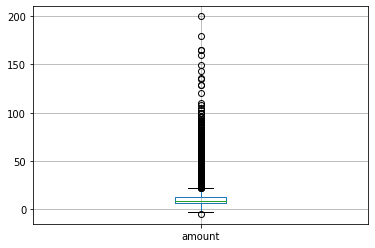

In [6]:
df.boxplot(column=["amount"])

In [7]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-1.5*IQR
  upper_range=Q3+1.5*IQR
  return lower_range,upper_range

<AxesSubplot:>

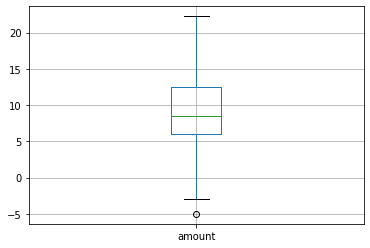

In [8]:
low_leadtime,high_leadtime= remove_outlier(df["amount"])
df["amount"]=np.where(df["amount"]>high_leadtime,high_leadtime,df["amount"])
df.boxplot(column=["amount"])

In [9]:
dummies=pd.get_dummies(df[["unique_id","date_time_of_pickup"]])

In [10]:
dummies.head()

,unique_id_00:00.0,unique_id_00:01.0,unique_id_00:02.0,unique_id_00:03.0,unique_id_00:04.0,unique_id_00:05.0,unique_id_00:06.0,unique_id_00:07.0,unique_id_00:08.0,unique_id_00:09.0,...,date_time_of_pickup_2015-06-30 06:45:23 UTC,date_time_of_pickup_2015-06-30 08:29:06 UTC,date_time_of_pickup_2015-06-30 10:58:55 UTC,date_time_of_pickup_2015-06-30 15:45:14 UTC,date_time_of_pickup_2015-06-30 16:05:50 UTC,date_time_of_pickup_2015-06-30 17:59:31 UTC,date_time_of_pickup_2015-06-30 19:14:39 UTC,date_time_of_pickup_2015-06-30 19:42:23 UTC,date_time_of_pickup_2015-06-30 20:50:04 UTC,date_time_of_pickup_2015-06-30 22:42:39 UTC
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
column=["unique_id","date_time_of_pickup"]

In [12]:
df=pd.concat([df,dummies],axis=1)

In [13]:
df.drop(column,axis=1,inplace=True)